In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, r2_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm, datasets
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier, Pool
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [5]:
df['booking_status'].describe()

count    42100.000000
mean         0.392019
std          0.488207
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: booking_status, dtype: float64

In [6]:
df.head(5)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


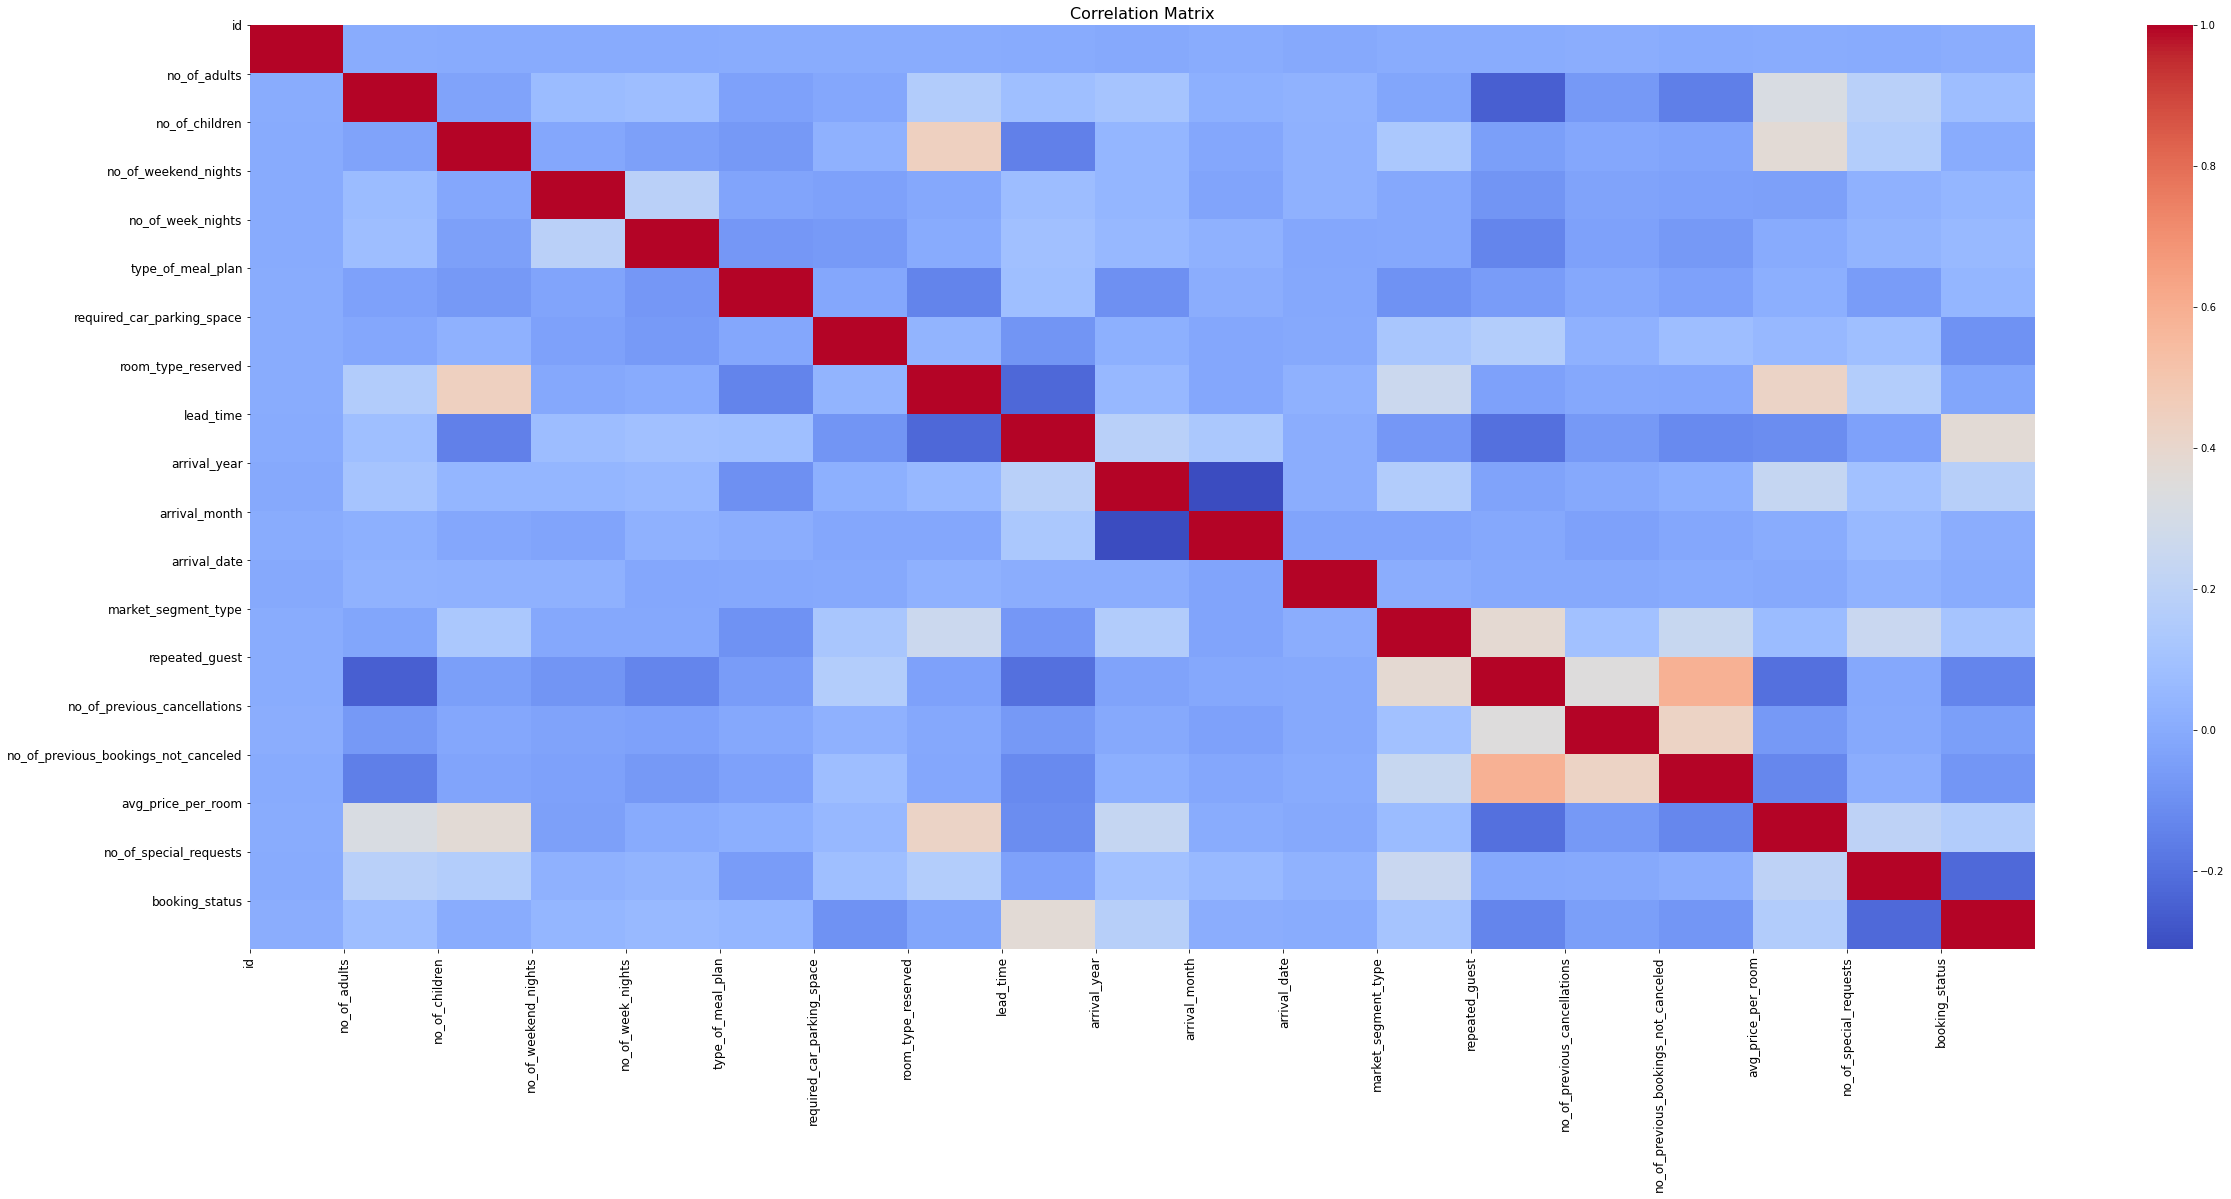

In [13]:
plt.figure(figsize=(40,17))

corr = df.corr()  # Call the corr() method on the DataFrame to get the correlation matrix
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')

plt.xticks(range(len(corr.columns)), corr.columns, fontsize=12)
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=12)

plt.title('Correlation Matrix', fontsize=16)

plt.show()

In [9]:
# X = df.drop('booking_status',axis=1)
y = df['booking_status']

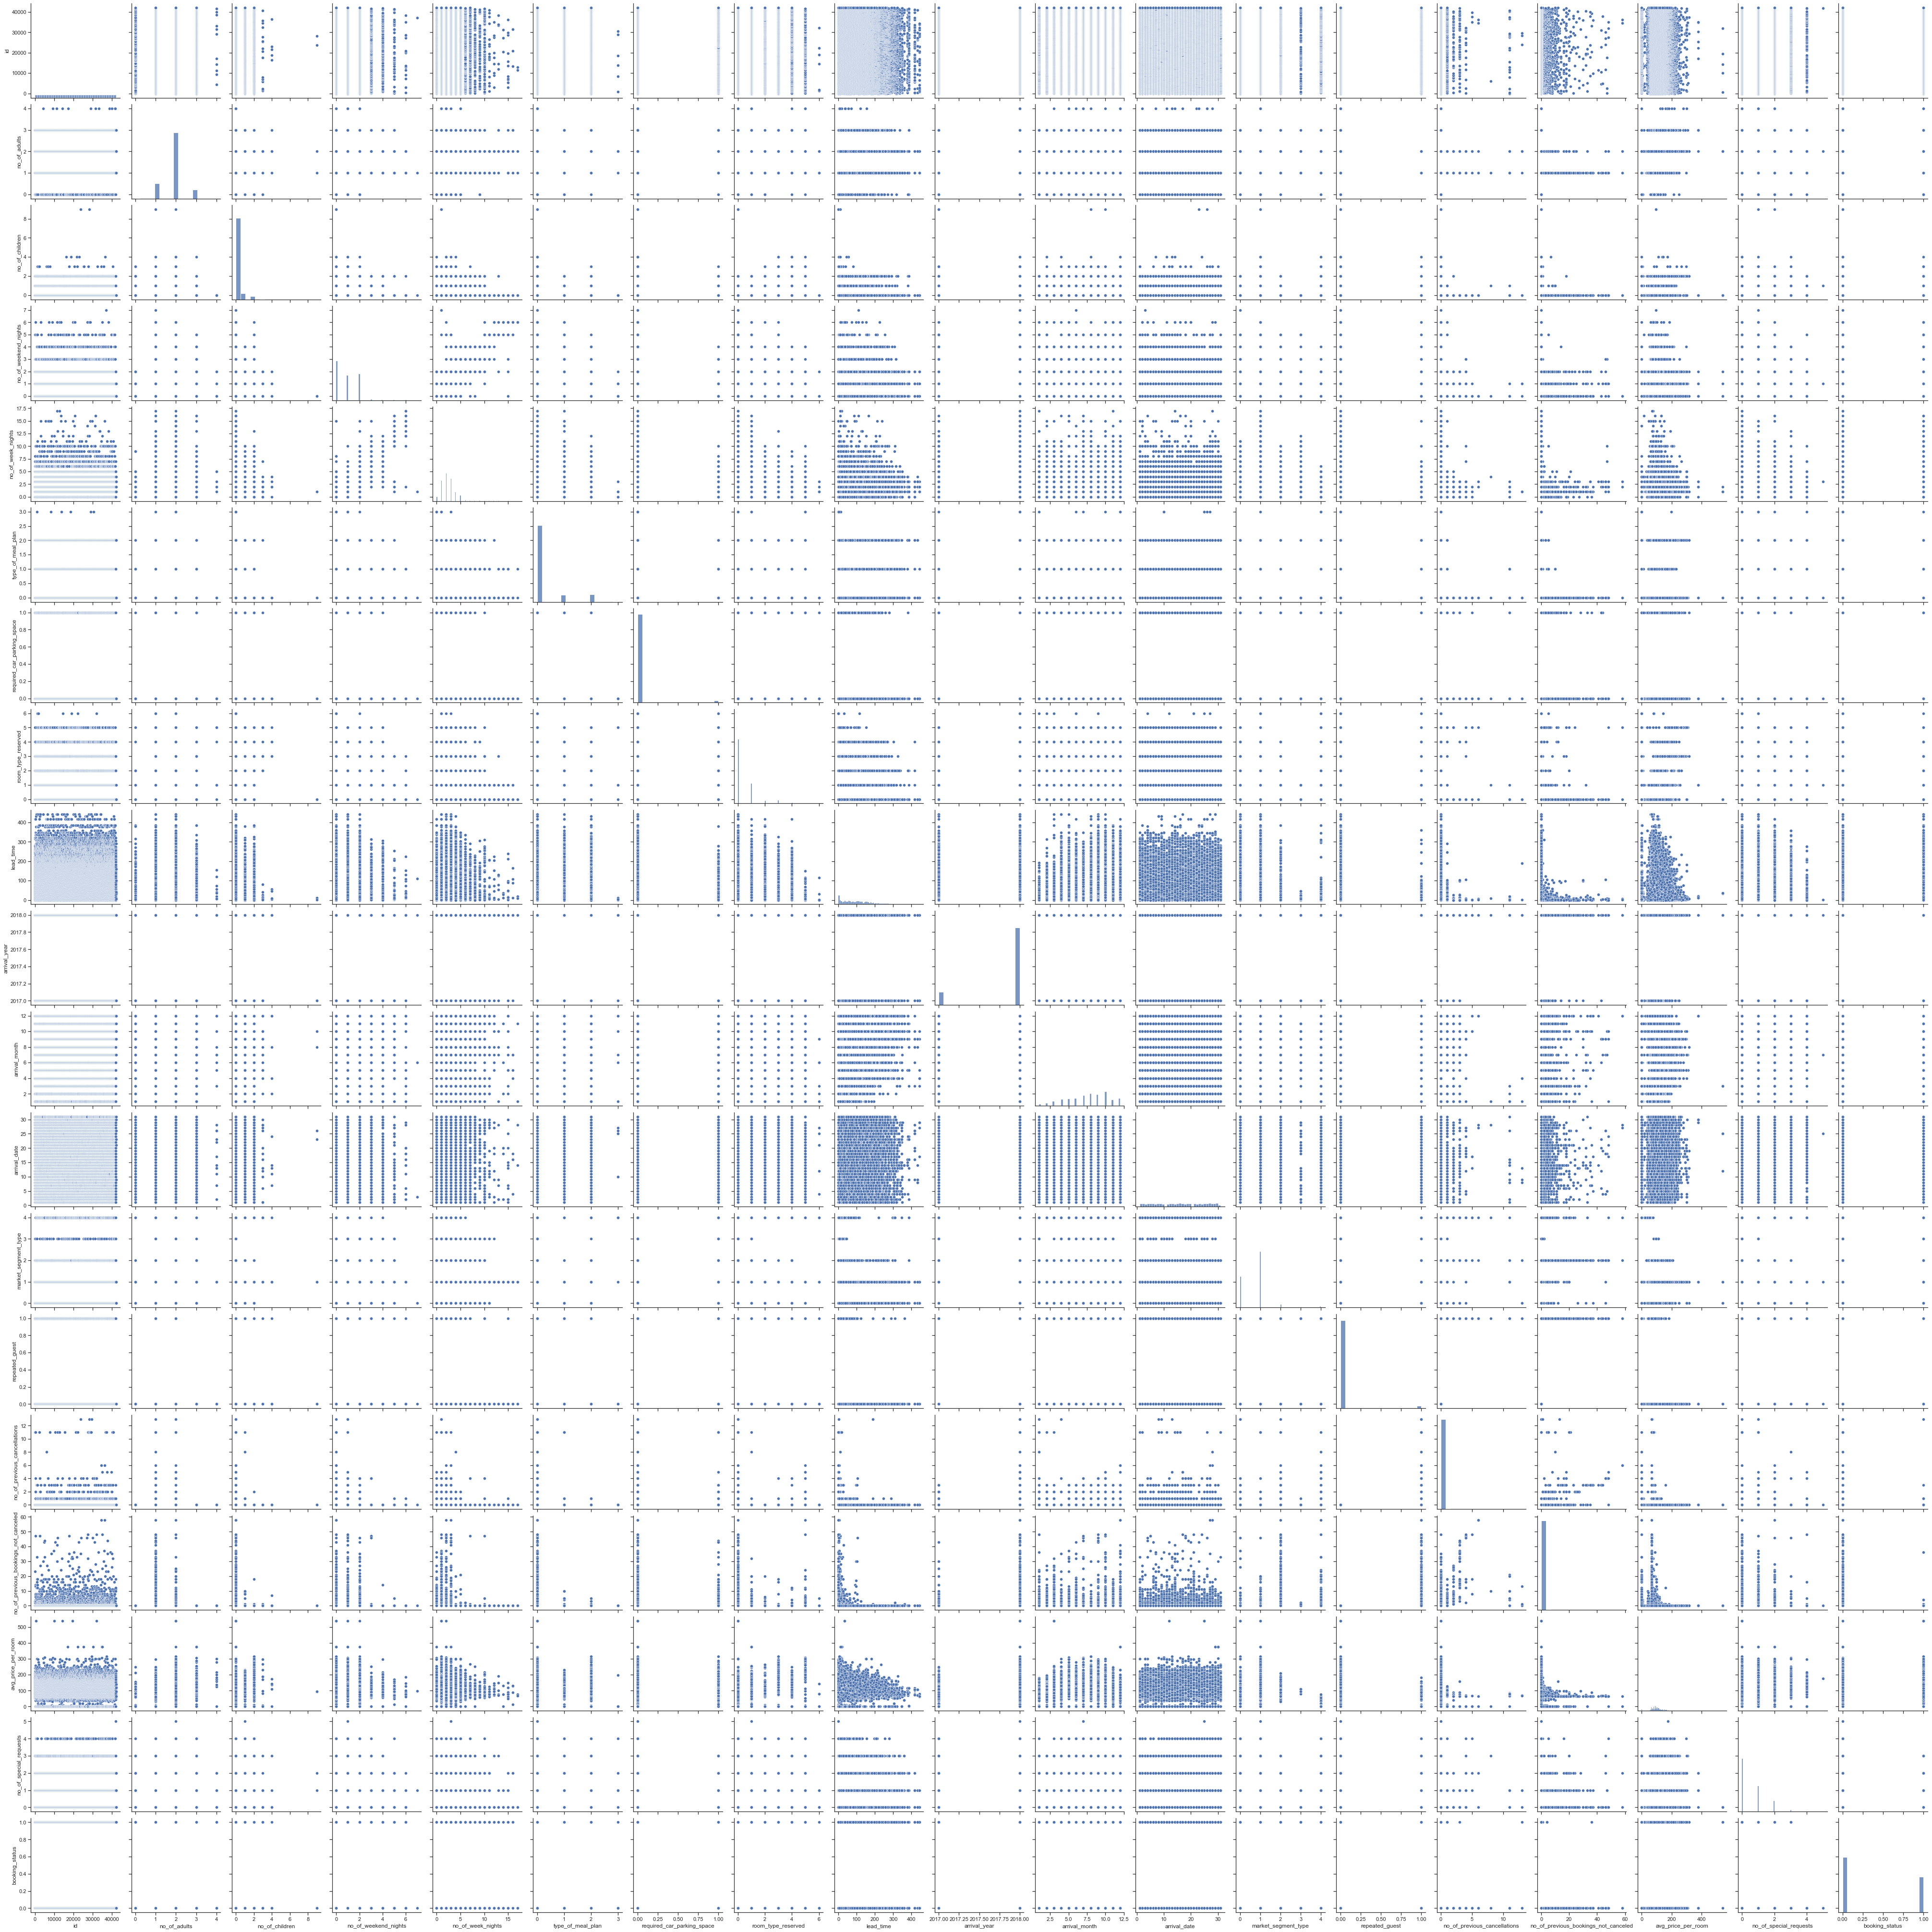

In [9]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, height=3)

In [10]:
for column in df.columns:

    duplicates = df[column].duplicated(keep='last')
    duplicates_count = duplicates.sum()
    
    print(f"Column {column}: {duplicates_count} duplicates")

Column id: 0 duplicates
Column no_of_adults: 42095 duplicates
Column no_of_children: 42094 duplicates
Column no_of_weekend_nights: 42092 duplicates
Column no_of_week_nights: 42082 duplicates
Column type_of_meal_plan: 42096 duplicates
Column required_car_parking_space: 42098 duplicates
Column room_type_reserved: 42093 duplicates
Column lead_time: 41762 duplicates
Column arrival_year: 42098 duplicates
Column arrival_month: 42088 duplicates
Column arrival_date: 42069 duplicates
Column market_segment_type: 42095 duplicates
Column repeated_guest: 42098 duplicates
Column no_of_previous_cancellations: 42090 duplicates
Column no_of_previous_bookings_not_canceled: 42058 duplicates
Column avg_price_per_room: 39814 duplicates
Column no_of_special_requests: 42094 duplicates
Column booking_status: 42098 duplicates


In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

0.6662660253555417


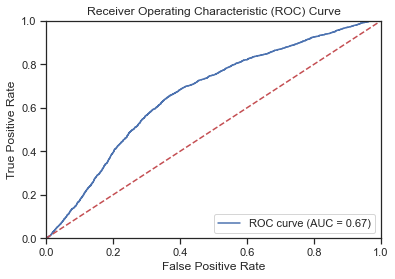

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

Evaluation Metrics:
ROC AUC Score: 0.8330
RMSE: 0.4812
MSE: 0.2316
R-squared Score: 0.0250
Accuracy: 0.7684
F1 Score: 0.6917


0.730859831952733


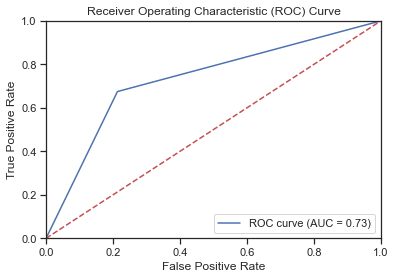

Evaluation Metrics:
ROC AUC Score: 0.7309
RMSE: 0.5066
MSE: 0.2567
R-squared Score: -0.0805
Accuracy: 0.7433
F1 Score: 0.6713


In [14]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.8867399424007602


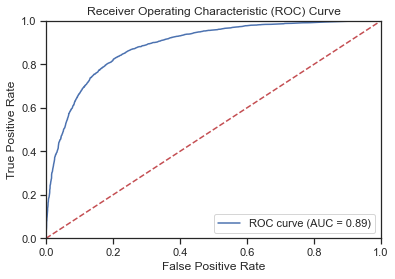

Evaluation Metrics:
ROC AUC Score: 0.8867
RMSE: 0.4292
MSE: 0.1842
R-squared Score: 0.2245
Accuracy: 0.8158
F1 Score: 0.7549


In [15]:
model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.7978948962322971


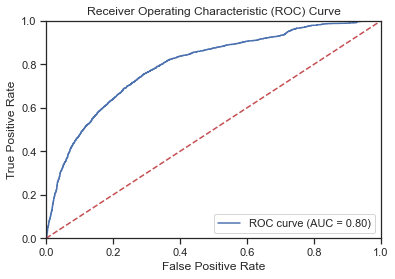

Evaluation Metrics:
ROC AUC Score: 0.7979
RMSE: 0.7426
MSE: 0.5514
R-squared Score: -1.3214
Accuracy: 0.4486
F1 Score: 0.5821


In [16]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

In [ ]:
model = svm.SVC(kernel='linear', C=3, probability=True)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_valid)[:,1]


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.8808744395950239


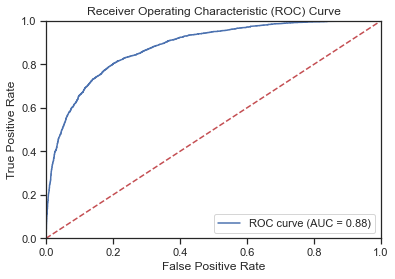

Evaluation Metrics:
ROC AUC Score: 0.8809
RMSE: 0.4380
MSE: 0.1918
R-squared Score: 0.1925
Accuracy: 0.8082
F1 Score: 0.7406


In [18]:
model = GradientBoostingRegressor() 
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.7960238710252072


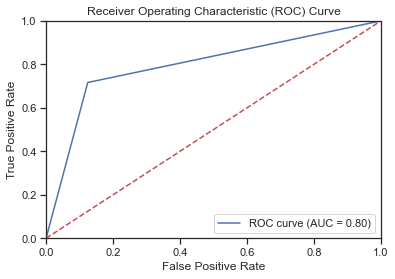

Evaluation Metrics:
ROC AUC Score: 0.7960
RMSE: 0.4315
MSE: 0.1862
R-squared Score: 0.2160
Accuracy: 0.8138
F1 Score: 0.7493


In [19]:
model = GradientBoostingClassifier() 
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.751354769751492


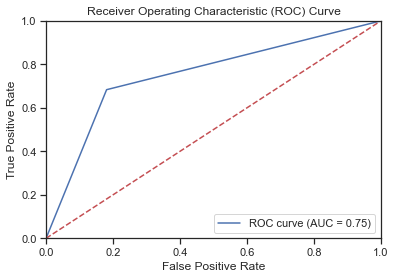

Evaluation Metrics:
ROC AUC Score: 0.7514
RMSE: 0.4832
MSE: 0.2335
R-squared Score: 0.0170
Accuracy: 0.7665
F1 Score: 0.6945


In [20]:
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.8097123007036606


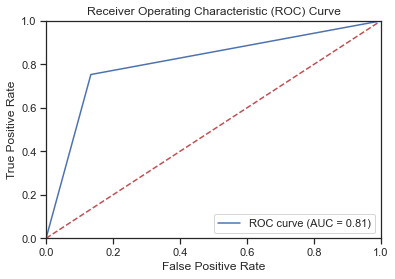

Evaluation Metrics:
ROC AUC Score: 0.8097
RMSE: 0.4215
MSE: 0.1777
R-squared Score: 0.2520
Accuracy: 0.8223
F1 Score: 0.7671


In [21]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

Epoch 1/100
1053/1053 [==============================] - 3s 2ms/step - loss: 0.4831 - accuracy: 0.7644
Epoch 2/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4563 - accuracy: 0.7879
Epoch 3/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4495 - accuracy: 0.7918
Epoch 4/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4449 - accuracy: 0.7952
Epoch 5/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4414 - accuracy: 0.7985
Epoch 6/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.7977
Epoch 7/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4358 - accuracy: 0.8008
Epoch 8/100
1053/1053 [==============================] - 3s 3ms/step - loss: 0.4336 - accuracy: 0.8011
Epoch 9/100
1053/1053 [==============================] - 2s 2ms/step - loss: 0.4316 - accuracy: 0.8025
Epoch 10/100
1053/1053 [==============================] - 2s 2ms/step - l

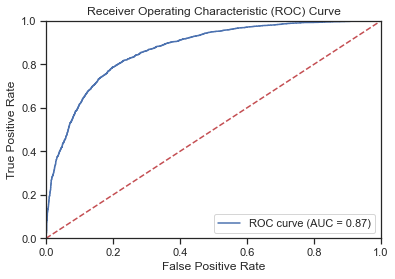

264/264 [==============================] - 0s 1ms/step
Evaluation Metrics:
ROC AUC Score: 0.8696
RMSE: 0.4495
MSE: 0.2020
R-squared Score: 0.1495
Accuracy: 0.7980
F1 Score: 0.7227


In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
0.8037540453074434


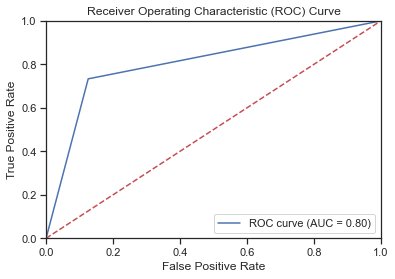

Evaluation Metrics:
ROC AUC Score: 0.8038
RMSE: 0.4249
MSE: 0.1805
R-squared Score: 0.2400
Accuracy: 0.8195
F1 Score: 0.7593


In [23]:
#gradient boosting machine model

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 35,
    'learning_rate': 0.05,
    'feature_fraction': 0.5
}
model = lgb.LGBMClassifier(**params)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0.8109429648763398


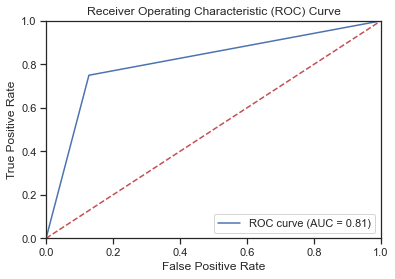

Evaluation Metrics:
ROC AUC Score: 0.8109
RMSE: 0.4188
MSE: 0.1754
R-squared Score: 0.2615
Accuracy: 0.8246
F1 Score: 0.7685


In [24]:
model = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

0:	learn: 0.6701659	total: 154ms	remaining: 2m 33s
1:	learn: 0.6499456	total: 164ms	remaining: 1m 21s
2:	learn: 0.6315775	total: 175ms	remaining: 58.1s
3:	learn: 0.6147124	total: 187ms	remaining: 46.6s
4:	learn: 0.6003131	total: 198ms	remaining: 39.5s
5:	learn: 0.5888255	total: 210ms	remaining: 34.8s
6:	learn: 0.5777028	total: 223ms	remaining: 31.6s
7:	learn: 0.5672256	total: 236ms	remaining: 29.2s
8:	learn: 0.5578069	total: 248ms	remaining: 27.4s
9:	learn: 0.5496059	total: 261ms	remaining: 25.8s
10:	learn: 0.5421573	total: 272ms	remaining: 24.5s
11:	learn: 0.5353492	total: 283ms	remaining: 23.3s
12:	learn: 0.5295783	total: 296ms	remaining: 22.4s
13:	learn: 0.5237982	total: 307ms	remaining: 21.6s
14:	learn: 0.5187616	total: 318ms	remaining: 20.9s
15:	learn: 0.5143954	total: 331ms	remaining: 20.3s
16:	learn: 0.5100495	total: 347ms	remaining: 20.1s
17:	learn: 0.5054031	total: 360ms	remaining: 19.6s
18:	learn: 0.5022796	total: 373ms	remaining: 19.3s
19:	learn: 0.4986591	total: 385ms	remai

177:	learn: 0.4241330	total: 2.24s	remaining: 10.4s
178:	learn: 0.4240561	total: 2.26s	remaining: 10.4s
179:	learn: 0.4238553	total: 2.27s	remaining: 10.4s
180:	learn: 0.4236751	total: 2.28s	remaining: 10.3s
181:	learn: 0.4236013	total: 2.29s	remaining: 10.3s
182:	learn: 0.4234783	total: 2.31s	remaining: 10.3s
183:	learn: 0.4233503	total: 2.32s	remaining: 10.3s
184:	learn: 0.4232567	total: 2.33s	remaining: 10.3s
185:	learn: 0.4231802	total: 2.34s	remaining: 10.2s
186:	learn: 0.4230804	total: 2.35s	remaining: 10.2s
187:	learn: 0.4229567	total: 2.36s	remaining: 10.2s
188:	learn: 0.4227899	total: 2.37s	remaining: 10.2s
189:	learn: 0.4227089	total: 2.38s	remaining: 10.2s
190:	learn: 0.4225623	total: 2.39s	remaining: 10.1s
191:	learn: 0.4224393	total: 2.4s	remaining: 10.1s
192:	learn: 0.4223018	total: 2.41s	remaining: 10.1s
193:	learn: 0.4221291	total: 2.42s	remaining: 10.1s
194:	learn: 0.4220392	total: 2.43s	remaining: 10s
195:	learn: 0.4219611	total: 2.45s	remaining: 10s
196:	learn: 0.421

354:	learn: 0.4067082	total: 4.11s	remaining: 7.46s
355:	learn: 0.4066605	total: 4.12s	remaining: 7.45s
356:	learn: 0.4065848	total: 4.13s	remaining: 7.43s
357:	learn: 0.4065779	total: 4.14s	remaining: 7.42s
358:	learn: 0.4065368	total: 4.14s	remaining: 7.4s
359:	learn: 0.4064879	total: 4.15s	remaining: 7.38s
360:	learn: 0.4064198	total: 4.16s	remaining: 7.37s
361:	learn: 0.4063213	total: 4.17s	remaining: 7.35s
362:	learn: 0.4062633	total: 4.18s	remaining: 7.33s
363:	learn: 0.4061836	total: 4.19s	remaining: 7.31s
364:	learn: 0.4060934	total: 4.19s	remaining: 7.3s
365:	learn: 0.4060100	total: 4.2s	remaining: 7.28s
366:	learn: 0.4059244	total: 4.21s	remaining: 7.26s
367:	learn: 0.4058483	total: 4.22s	remaining: 7.25s
368:	learn: 0.4057661	total: 4.23s	remaining: 7.23s
369:	learn: 0.4056588	total: 4.23s	remaining: 7.21s
370:	learn: 0.4056108	total: 4.24s	remaining: 7.19s
371:	learn: 0.4055139	total: 4.25s	remaining: 7.17s
372:	learn: 0.4054323	total: 4.26s	remaining: 7.16s
373:	learn: 0.4

518:	learn: 0.3971127	total: 5.6s	remaining: 5.19s
519:	learn: 0.3970798	total: 5.61s	remaining: 5.18s
520:	learn: 0.3970270	total: 5.63s	remaining: 5.17s
521:	learn: 0.3969723	total: 5.64s	remaining: 5.16s
522:	learn: 0.3969435	total: 5.65s	remaining: 5.15s
523:	learn: 0.3968853	total: 5.65s	remaining: 5.14s
524:	learn: 0.3968827	total: 5.66s	remaining: 5.12s
525:	learn: 0.3968383	total: 5.67s	remaining: 5.11s
526:	learn: 0.3967957	total: 5.68s	remaining: 5.1s
527:	learn: 0.3967339	total: 5.69s	remaining: 5.08s
528:	learn: 0.3966574	total: 5.7s	remaining: 5.07s
529:	learn: 0.3966090	total: 5.71s	remaining: 5.06s
530:	learn: 0.3965478	total: 5.71s	remaining: 5.04s
531:	learn: 0.3965187	total: 5.72s	remaining: 5.03s
532:	learn: 0.3964520	total: 5.73s	remaining: 5.02s
533:	learn: 0.3963933	total: 5.74s	remaining: 5s
534:	learn: 0.3963315	total: 5.74s	remaining: 4.99s
535:	learn: 0.3962722	total: 5.75s	remaining: 4.98s
536:	learn: 0.3962382	total: 5.76s	remaining: 4.97s
537:	learn: 0.3961

683:	learn: 0.3894768	total: 7.13s	remaining: 3.29s
684:	learn: 0.3894453	total: 7.14s	remaining: 3.28s
685:	learn: 0.3894001	total: 7.15s	remaining: 3.27s
686:	learn: 0.3893626	total: 7.16s	remaining: 3.26s
687:	learn: 0.3893375	total: 7.17s	remaining: 3.25s
688:	learn: 0.3892764	total: 7.19s	remaining: 3.24s
689:	learn: 0.3892289	total: 7.2s	remaining: 3.23s
690:	learn: 0.3891840	total: 7.21s	remaining: 3.22s
691:	learn: 0.3891404	total: 7.22s	remaining: 3.21s
692:	learn: 0.3891053	total: 7.23s	remaining: 3.2s
693:	learn: 0.3890657	total: 7.24s	remaining: 3.19s
694:	learn: 0.3890372	total: 7.25s	remaining: 3.18s
695:	learn: 0.3889523	total: 7.26s	remaining: 3.17s
696:	learn: 0.3888863	total: 7.27s	remaining: 3.16s
697:	learn: 0.3888596	total: 7.28s	remaining: 3.15s
698:	learn: 0.3888331	total: 7.28s	remaining: 3.14s
699:	learn: 0.3888191	total: 7.29s	remaining: 3.13s
700:	learn: 0.3887597	total: 7.3s	remaining: 3.11s
701:	learn: 0.3887146	total: 7.31s	remaining: 3.1s
702:	learn: 0.38

842:	learn: 0.3834930	total: 8.69s	remaining: 1.62s
843:	learn: 0.3834655	total: 8.7s	remaining: 1.61s
844:	learn: 0.3834332	total: 8.71s	remaining: 1.6s
845:	learn: 0.3833945	total: 8.72s	remaining: 1.59s
846:	learn: 0.3833715	total: 8.73s	remaining: 1.58s
847:	learn: 0.3833374	total: 8.74s	remaining: 1.57s
848:	learn: 0.3832872	total: 8.75s	remaining: 1.55s
849:	learn: 0.3832448	total: 8.75s	remaining: 1.54s
850:	learn: 0.3832217	total: 8.76s	remaining: 1.53s
851:	learn: 0.3831928	total: 8.77s	remaining: 1.52s
852:	learn: 0.3831634	total: 8.78s	remaining: 1.51s
853:	learn: 0.3831368	total: 8.79s	remaining: 1.5s
854:	learn: 0.3831150	total: 8.8s	remaining: 1.49s
855:	learn: 0.3830776	total: 8.81s	remaining: 1.48s
856:	learn: 0.3830147	total: 8.81s	remaining: 1.47s
857:	learn: 0.3829698	total: 8.82s	remaining: 1.46s
858:	learn: 0.3829690	total: 8.83s	remaining: 1.45s
859:	learn: 0.3829464	total: 8.84s	remaining: 1.44s
860:	learn: 0.3829444	total: 8.85s	remaining: 1.43s
861:	learn: 0.38

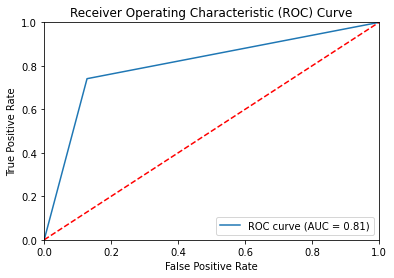

Evaluation Metrics:
ROC AUC Score: 0.8065
RMSE: 0.4229
MSE: 0.1789
R-squared Score: 0.2470
Accuracy: 0.8211
F1 Score: 0.7629


In [6]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=4, l2_leaf_reg=3, random_seed=42)
model.fit(X_train, y_train)
y_pred_proba = model.predict(X_valid)


fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(roc_auc)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


y_pred = model.predict(X_valid).round()
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mse = mean_squared_error(y_valid, y_pred)


r2 = r2_score(y_valid, y_pred)
acc = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)


print("Evaluation Metrics:")
print("ROC AUC Score: {:.4f}".format(roc_auc))
print("RMSE: {:.4f}".format(rmse))
print("MSE: {:.4f}".format(mse))
print("R-squared Score: {:.4f}".format(r2))
print("Accuracy: {:.4f}".format(acc))
print("F1 Score: {:.4f}".format(f1))

In [8]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

Cross-validation accuracy: 0.7929216152019002


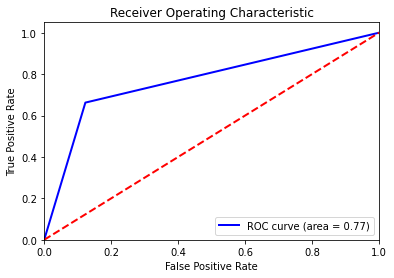

In [9]:
k = 10
rfc = RandomForestClassifier(n_estimators=1000, max_depth=4, random_state=42)
cv = StratifiedKFold(n_splits=k, random_state=42, shuffle=True)

y_true = []
y_pred = []


for train_idx, test_idx in cv.split(X, y):
    X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

    rfc.fit(X_train, y_train)
    y_pred_fold = rfc.predict(X_valid)

    y_true.extend(y_valid)
    y_pred.extend(y_pred_fold)

    
cv_acc = np.mean(cross_val_score(rfc, X, y, cv=cv))
print('Cross-validation accuracy:', cv_acc)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [29]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

0.8946368064262191


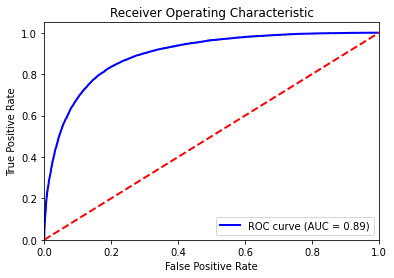

In [10]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

xgb_clf = xgb.XGBClassifier()
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

y_true = []
y_prob = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb_clf.fit(X_train, y_train)
    y_pred_prob = xgb_clf.predict_proba(X_test)[:, 1]
    
    y_true.append(y_test)
    y_prob.append(y_pred_prob)

y_true_all = np.concatenate(y_true)
y_prob_all = np.concatenate(y_prob)

fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [32]:
df = pd.read_csv('train.csv')

In [33]:
X = df.drop('booking_status',axis=1)
y = df['booking_status']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

Fold 1/5
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.900903	valid_1's auc: 0.894699
[200]	training's auc: 0.91457	valid_1's auc: 0.898076
[300]	training's auc: 0.924887	valid_1's auc: 0.898886
[400]	training's auc: 0.933503	valid_1's auc: 0.898949
Early stopping, best iteration is:
[386]	training's auc: 0.932368	valid_1's auc: 0.89903
Fold 2/5
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.900906	valid_1's auc: 0.89265
[200]	training's auc: 0.914878	valid_1's auc: 0.896037
[300]	training's auc: 0.925094	valid_1's auc: 0.897272
[400]	training's auc: 0.933306	valid_1's auc: 0.897982
[500]	training's auc: 0.940368	valid_1's auc: 0.898575
[600]	training's auc: 0.946751	valid_1's auc: 0.898634
Early stopping, best iteration is:
[530]	training's auc: 0.942531	valid_1's auc: 0.898878
Fold 3/5
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.901596	valid_1's auc: 0.890867
[200]

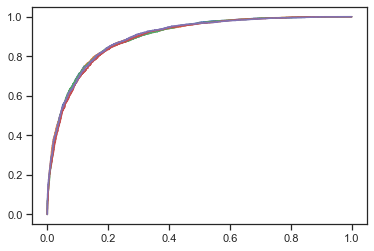

In [34]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

def evaluate(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred.round())
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    f1 = f1_score(y_true, y_pred.round())
    return roc_auc, acc, rmse, f1


params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "verbosity": -1,
    "num_leaves": 31,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1000,
    "seed": 42,
}


roc_auc_list = []
acc_list = []
rmse_list = []
f1_list = []


for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f"Fold {fold+1}/{n_folds}")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
        verbose_eval=100,
        early_stopping_rounds=100,

    )
    
    
    y_val_pred = model.predict(X_val)
    roc_auc, acc, rmse, f1 = evaluate(y_val, y_val_pred)
    roc_auc_list.append(roc_auc)
    acc_list.append(acc)
    rmse_list.append(rmse)
    f1_list.append(f1)
    

    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    plt.plot(fpr, tpr, label=f"Fold {fold+1}")
    

print(f"Average ROC AUC: {np.mean(roc_auc_list):.3f}")
print(f"Average Accuracy: {np.mean(acc_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average F1 score: {np.mean(f1_list):.3f}")

Fold 1/15
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.90196	valid_1's auc: 0.895415
[200]	training's auc: 0.91566	valid_1's auc: 0.898047
[300]	training's auc: 0.925337	valid_1's auc: 0.898718
Early stopping, best iteration is:
[277]	training's auc: 0.923275	valid_1's auc: 0.898975
Fold 2/15
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.902276	valid_1's auc: 0.890867
[200]	training's auc: 0.915317	valid_1's auc: 0.894144
[300]	training's auc: 0.92533	valid_1's auc: 0.895323
[400]	training's auc: 0.933216	valid_1's auc: 0.896705
[500]	training's auc: 0.940495	valid_1's auc: 0.896974
[600]	training's auc: 0.947004	valid_1's auc: 0.897605
[700]	training's auc: 0.952173	valid_1's auc: 0.897705
[800]	training's auc: 0.957079	valid_1's auc: 0.898103
[900]	training's auc: 0.961444	valid_1's auc: 0.898241
Early stopping, best iteration is:
[872]	training's auc: 0.960448	valid_1's auc: 0.898565
Fold 3/15
Training 

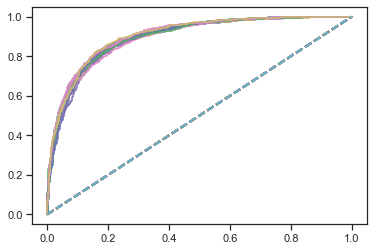

In [39]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_folds = 15
kf = KFold(n_splits=n_folds, shuffle=True)

def evaluate(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred.round())
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    f1 = f1_score(y_true, y_pred.round())
    return roc_auc, acc, rmse, f1

params = {
    "objective": "binary",
    "metric": "auc",
    "boosting_type": "gbdt",
    "verbosity": -1,
    "num_leaves": 35,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "n_estimators": 1000,
    "seed": 42,
}


roc_auc_list = []
acc_list = []
rmse_list = []
f1_list = []


for fold, (train_idx, val_idx) in enumerate(kf.split(X,y)):
    print(f"Fold {fold+1}/{n_folds}")
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]
    
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    

    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, val_data],
        verbose_eval=100,
        early_stopping_rounds=100)
    

    y_val_pred = model.predict(X_val)
    roc_auc, acc, rmse, f1 = evaluate(y_val, y_val_pred)
    roc_auc_list.append(roc_auc)
    acc_list.append(acc)
    rmse_list.append(rmse)
    f1_list.append(f1)
    

    fpr, tpr, _ = roc_curve(y_val, y_val_pred)
    plt.plot(fpr, tpr, label=f"Fold {fold+1}")
    plt.plot([0,1], [0,1] ,lw=2, linestyle="--")
    

print(f"Average ROC AUC: {np.mean(roc_auc_list):.3f}")
print(f"Average Accuracy: {np.mean(acc_list):.3f}")
print(f"Average RMSE: {np.mean(rmse_list):.3f}")
print(f"Average F1 score: {np.mean(f1_list):.3f}")

In [37]:
test_df=pd.read_csv('test.csv')
prediction_test=model.predict(test_df)
pd.DataFrame(prediction_test).to_csv('model_submission5.csv')